In [39]:
import pandas as pd
import seaborn as sns
f1='london_merged.csv'
df=pd.read_csv(f1)
print(df.info())
f2='bk.csv'
df1=pd.read_csv(f2)
print(df1.info())
New_bike = pd.concat([df, df1], ignore_index=True)
New_bike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17233 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17253 non-null  object 
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
dtypes: float64(3), int64(5), object(2)
memory usage: 1.3+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   casual      17414 non-null  int64
 1   registered  17414 non-null  int64
dtypes: int64(2)
memory usage: 272.2 KB
None

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,casual,registered
0,4/01/2015 0:00,182.0,3.0,2.0,93,6.0,3.0,0.0,1.0,3.0,NaN,NaN
1,4/01/2015 1:00,138.0,3.0,2.5,93,5.0,1.0,0.0,1.0,3.0,NaN,NaN
2,4/01/2015 2:00,134.0,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,NaN,NaN
3,4/01/2015 3:00,72.0,2.0,2.0,100,0.0,1.0,0.0,1.0,3.0,NaN,NaN
4,4/01/2015 4:00,47.0,2.0,0.0,93,6.5,1.0,0.0,1.0,3.0,NaN,NaN


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()
f1 = "london_merged.csv"
df = spark.read.csv(f1, header=True, inferSchema=True)
df.printSchema()
df.show()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/22 11:37:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- timestamp: string (nullable = true)
 |-- cnt: integer (nullable = true)
 |-- t1: double (nullable = true)
 |-- t2: double (nullable = true)
 |-- hum: string (nullable = true)
 |-- wind_speed: double (nullable = true)
 |-- weather_code: integer (nullable = true)
 |-- is_holiday: integer (nullable = true)
 |-- is_weekend: integer (nullable = true)
 |-- season: integer (nullable = true)

+---------------+----+---+----+----+----------+------------+----------+----------+------+
|      timestamp| cnt| t1|  t2| hum|wind_speed|weather_code|is_holiday|is_weekend|season|
+---------------+----+---+----+----+----------+------------+----------+----------+------+
| 4/01/2015 0:00| 182|3.0| 2.0|  93|       6.0|           3|         0|         1|     3|
| 4/01/2015 1:00| 138|3.0| 2.5|  93|       5.0|           1|         0|         1|     3|
| 4/01/2015 2:00| 134|2.5| 2.5|96.5|       0.0|           1|         0|         1|     3|
| 4/01/2015 3:00|  72|2.0| 2.0| 100|       0.0|           1|  

In [9]:
import pandas as pd
import seaborn as sns
f2='bk.csv'
df1=pd.read_csv(f2)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   casual      17414 non-null  int64
 1   registered  17414 non-null  int64
dtypes: int64(2)
memory usage: 272.2 KB
None


In [1]:
import pandas as pd

# Load the dataset
file_path = 'london_merged.csv'
df = pd.read_csv(file_path)

# Display missing values before filling
print("Missing values before filling:")
print(df.isnull().sum())

# Ensure the columns are of the correct data type
df['t1'] = pd.to_numeric(df['t1'], errors='coerce')
df['hum'] = pd.to_numeric(df['hum'], errors='coerce')

# Fill missing values with the mean of each column
df['t1'].fillna(df['t1'].mean(), inplace=True)
df['hum'].fillna(df['hum'].mean(), inplace=True)

# Display missing values after filling
print("Missing values after filling:")
print(df.isnull().sum())








Missing values before filling:
timestamp         0
cnt               0
t1              181
t2                0
hum             161
wind_speed        0
weather_code      0
is_holiday        0
is_weekend        0
season            0
dtype: int64
Missing values after filling:
timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64


In [10]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("ReadCSV").getOrCreate()
f2 = "bk.csv"
df1 = spark.read.csv(f2, header=True, inferSchema=True)
df1.printSchema()
df1.show()

root
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)

+------+----------+
|casual|registered|
+------+----------+
|     3|        13|
|     8|        32|
|     5|        27|
|     3|        10|
|     0|         1|
|     0|         1|
|     2|         0|
|     1|         2|
|     1|         7|
|     8|         6|
|    12|        24|
|    26|        30|
|    29|        55|
|    47|        47|
|    35|        71|
|    40|        70|
|    41|        52|
|    15|        52|
|     9|        26|
|     6|        31|
+------+----------+
only showing top 20 rows



In [11]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DatasetAnalysis").getOrCreate()

f1 = "london_merges.csv"
df = spark.read.csv(f1, header=True, inferSchema=True)

df.show()

columns = df.columns
print("column name:", columns)

num_rows = df.count()
num_columns = len(columns)
print("row count:", num_rows)
print("column count:", num_columns)

df.printSchema()

df.describe().show()

for i in columns:
    print(f"column '{i}' unique values and count:")
    df.groupBy(i).count().show()

+---------------+------+---+----+-----+----------+------------+----------+----------+------+------+----------+
|      timestamp|   cnt| t1|  t2|  hum|wind_speed|weather_code|is_holiday|is_weekend|season|casual|registered|
+---------------+------+---+----+-----+----------+------------+----------+----------+------+------+----------+
| 4/01/2015 0:00| 182.0|3.0| 2.0| 93.0|       6.0|           3|         0|         1|     3|     3|        13|
| 4/01/2015 1:00| 138.0|3.0| 2.5| 93.0|       5.0|           1|         0|         1|     3|     8|        32|
| 4/01/2015 2:00| 134.0|2.5| 2.5| 96.5|       0.0|           1|         0|         1|     3|     5|        27|
| 4/01/2015 3:00|  72.0|2.0| 2.0|100.0|       0.0|           1|         0|         1|     3|     3|        10|
| 4/01/2015 4:00|  47.0|2.0| 0.0| 93.0|       6.5|           1|         0|         1|     3|     5|         1|
| 4/01/2015 5:00|  46.0|2.0| 2.0| 93.0|       4.0|           1|         0|         1|     3|     8|         1|
|

+-------+--------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+------------------+
|summary|     timestamp|               cnt|                t1|                t2|               hum|        wind_speed|      weather_code|         is_holiday|         is_weekend|            season|           casual|        registered|
+-------+--------------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+------------------+
|  count|         17414|             17414|             17414|             17414|             17414|             17414|             17414|              17414|              17414|             17414|            17414|             17414|
|   mean|          null|1143.1016423567244|12.46809080816182

In [24]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("DatasetAnalysis").getOrCreate()

f2 = "bk.csv"
df1 = spark.read.csv(f2, header=True, inferSchema=True)

df1.show()

columns = df1.columns
print("column name:", columns)

num_row = df1.count()
num_column = len(columns)
print("row count:", num_rows)
print("column count:", num_columns)

df1.printSchema()

df1.describe().show()

for i in columns:
    print(f"column '{i}' unique values and count:")
    df1.groupBy(i).count().show()

+------+----------+
|casual|registered|
+------+----------+
|     3|        13|
|     8|        32|
|     5|        27|
|     3|        10|
|     0|         1|
|     0|         1|
|     2|         0|
|     1|         2|
|     1|         7|
|     8|         6|
|    12|        24|
|    26|        30|
|    29|        55|
|    47|        47|
|    35|        71|
|    40|        70|
|    41|        52|
|    15|        52|
|     9|        26|
|     6|        31|
+------+----------+
only showing top 20 rows

column name: ['casual', 'registered']
row count: 17414
column count: 10
root
 |-- casual: integer (nullable = true)
 |-- registered: integer (nullable = true)

+-------+------------------+-----------------+
|summary|            casual|       registered|
+-------+------------------+-----------------+
|  count|             17414|            17414|
|   mean|35.655851613644195|153.5983117032273|
| stddev|  49.2665125235111|151.2694371354914|
|    min|                 0|                0|
|    

/home/ubuntu/.local/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


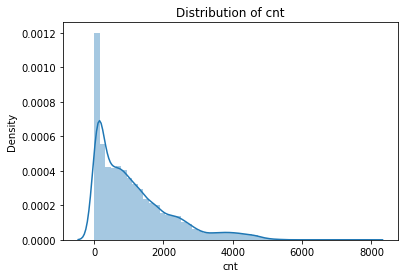

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the 'count' column of the PySpark DataFrame to a Pandas Series
count_series = df.select('cnt').toPandas()['cnt']

# Plot the distribution
sns.distplot(count_series)
plt.title('Distribution of cnt')
plt.show()

In [26]:
from pyspark.sql.functions import col, count, when

# Function to check for missing and duplicate values
def check_data_issues(df, df_name):
    # Check for missing values
    missing_values = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
    print(f'Missing values in {df_name}:')
    missing_values.show()

    # Check for duplicate values
    duplicates = df.groupBy(df.columns).agg(count('*').alias('count_occurrences')).filter('count_occurrences > 1')
    print(f'Duplicate values in {df_name}:')
    duplicates.show()

# Check issues for df
check_data_issues(df, "london_merged.csv")

# Check issues for df2
check_data_issues(df1, 'bk.csv')

Missing values in london_merged.csv:
+---------+---+---+---+---+----------+------------+----------+----------+------+
|timestamp|cnt| t1| t2|hum|wind_speed|weather_code|is_holiday|is_weekend|season|
+---------+---+---+---+---+----------+------------+----------+----------+------+
|        0|  0|181|  0|161|         0|           0|         0|         0|     0|
+---------+---+---+---+---+----------+------------+----------+----------+------+

Duplicate values in london_merged.csv:
+---------+---+---+---+---+----------+------------+----------+----------+------+-----------------+
|timestamp|cnt| t1| t2|hum|wind_speed|weather_code|is_holiday|is_weekend|season|count_occurrences|
+---------+---+---+---+---+----------+------------+----------+----------+------+-----------------+
+---------+---+---+---+---+----------+------------+----------+----------+------+-----------------+

Missing values in bk.csv:
+------+----------+
|casual|registered|
+------+----------+
|     0|         0|
+------+-------

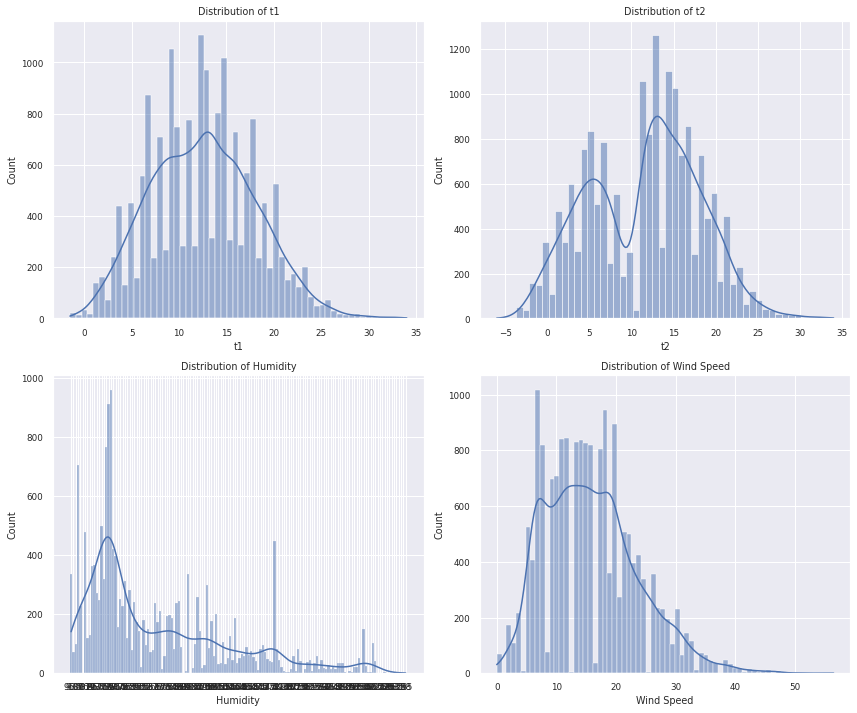

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert the necessary columns of the PySpark DataFrame to a Pandas DataFrame in one go
pdf = df.select('t1', 't2', 'hum', 'wind_speed').toPandas()

# Setup the figure and axes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot the distributions using seaborn
sns.histplot(pdf['t1'], kde=True, ax=axes[0, 0])
sns.histplot(pdf['t2'], kde=True, ax=axes[0, 1])
sns.histplot(pdf['hum'], kde=True, ax=axes[1, 0])
sns.histplot(pdf['wind_speed'], kde=True, ax=axes[1, 1])

# Set titles and labels for each subplot
axes[0, 0].set(title='Distribution of t1', xlabel='t1')
axes[0, 1].set(title='Distribution of t2', xlabel='t2')
axes[1, 0].set(title='Distribution of Humidity', xlabel='Humidity')
axes[1, 1].set(title='Distribution of Wind Speed', xlabel='Wind Speed')

plt.tight_layout()
plt.show()

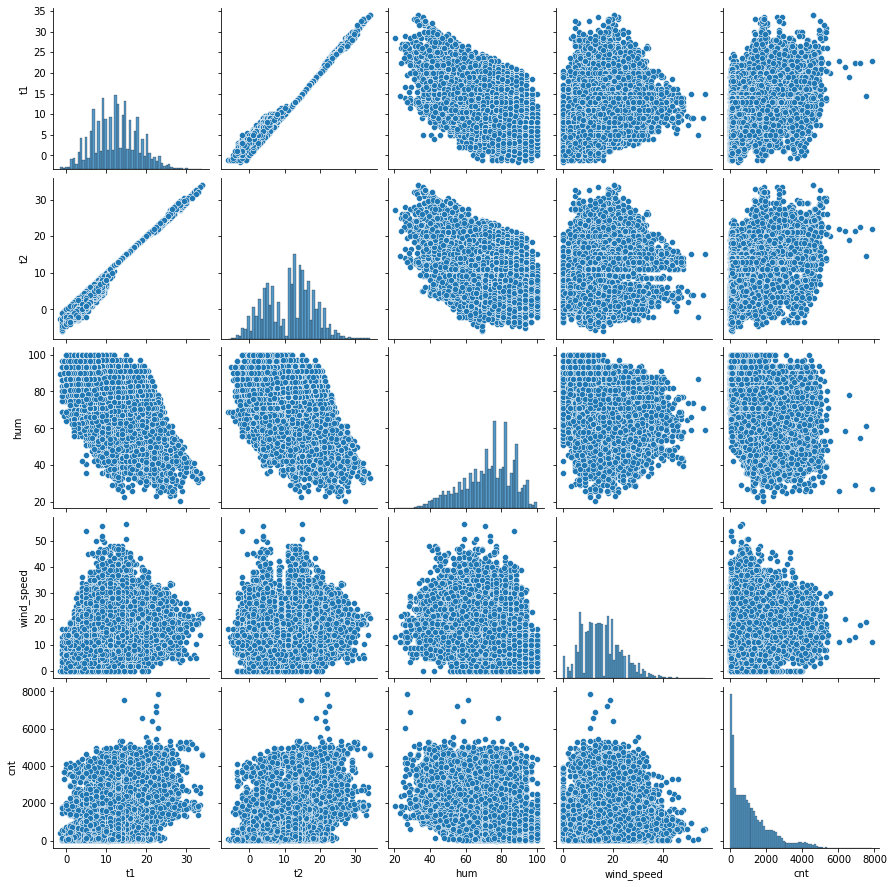

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Directly convert the PySpark DataFrame to a Pandas DataFrame with the selected columns
df_pandas = df.select('t1', 't2', 'hum', 'wind_speed', 'cnt').toPandas()

# Use seaborn's pairplot to visualize pairwise relationships in the dataset
sns.pairplot(df_pandas)
plt.show()  # Ensure the plot is displayed

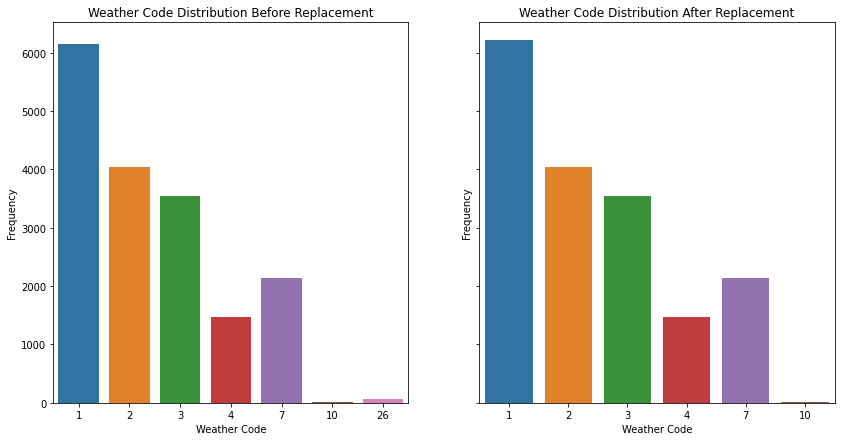

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
# Update the path to your file location
data = pd.read_csv(f1)

# Calculate the frequency of each 'weather_code' before replacing the outlier
weather_counts_before = data['weather_code'].value_counts()

# Replace the outlier '26' with the mode '1'
data['weather_code'].replace(26, 1, inplace=True)

# Calculate the frequency of each 'weather_code' after replacing the outlier
weather_counts_after = data['weather_code'].value_counts()

# Set up the figure for two subplots (before and after)
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Convert series to dataframe for plotting
weather_counts_before_df = weather_counts_before.reset_index()
weather_counts_before_df.columns = ['Weather Code', 'Frequency']
weather_counts_after_df = weather_counts_after.reset_index()
weather_counts_after_df.columns = ['Weather Code', 'Frequency']

# Plot before replacement
sns.barplot(x='Weather Code', y='Frequency', data=weather_counts_before_df, ax=axs[0])
axs[0].set_title('Weather Code Distribution Before Replacement')
axs[0].set_xlabel('Weather Code')
axs[0].set_ylabel('Frequency')

# Plot after replacement
sns.barplot(x='Weather Code', y='Frequency', data=weather_counts_after_df, ax=axs[1])
axs[1].set_title('Weather Code Distribution After Replacement')
axs[1].set_xlabel('Weather Code')

plt.show()


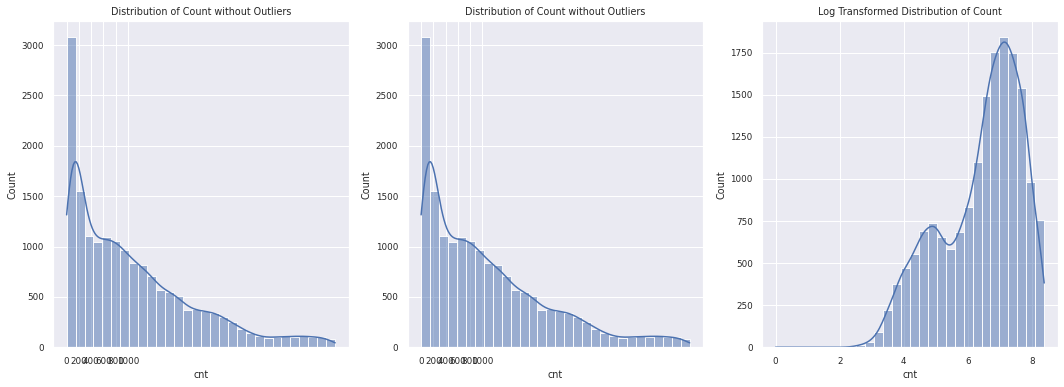

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(f1)

# Calculate mean and standard deviation of 'cnt'
mean_cnt = data['cnt'].mean()
standard_cnt = data['cnt'].std()

# Filter out outliers
data_outliers = data[(data['cnt'] - mean_cnt).abs() < 3 * standard_cnt]

# Set up the figure for three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Distribution plot for 'cnt' on the first and second axis
sns.histplot(data_outliers['cnt'], ax=ax1, kde=True, bins=30)
ax1.set_title('Distribution of Count without Outliers')
ax1.set_xticks(range(0, 1200, 200))

sns.histplot(data_outliers['cnt'], ax=ax2, kde=True, bins=30)
ax2.set_title('Distribution of Count without Outliers')
ax2.set_xticks(range(0, 1200, 200))

# Log-transformed distribution plot on the third axis
y_axis_log = np.log(data_outliers['cnt'] + 1)  # Use log(y+1) to handle zero counts
sns.histplot(y_axis_log, ax=ax3, kde=True, bins=30)
ax3.set_title('Log Transformed Distribution of Count')

plt.show()


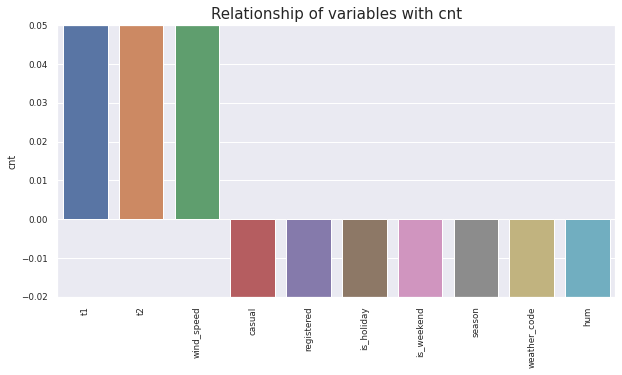

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset

data = pd.read_csv(f1)

# Ensure the data is appropriate for correlation analysis (numeric columns)
numeric_data = data.select_dtypes(include=[np.number])

# Compute the correlation matrix for 'cnt'
corr_matrix = numeric_data.corr()["cnt"]
corr_matrix = corr_matrix.drop("cnt", axis=0).sort_values(ascending=False)

# Plotting the correlation
plt.figure(figsize=(10,5))
sns.set(font_scale=0.8)
sns.barplot(x=corr_matrix.index, y=corr_matrix)
plt.xticks(rotation=90)
plt.ylim(-0.02, 0.05)  # Setting this range can highlight small variations
plt.title("Relationship of variables with cnt", fontsize=15)
plt.show()


In [7]:
import pandas as pd

# Assuming 'f1' is your DataFrame and it's already loaded  # Update the path to your file location

data = pd.read_csv(f1)
# Calculate mean and standard deviation of 'cnt'
mean_cnt = data['cnt'].mean()
standard_cnt = data['cnt'].std()

# Filter out outliers
f1_outliers = data[abs(data['cnt'] - mean_cnt) < 3 * standard_cnt]
count = f1_outliers.count()
print(count)

timestamp       17155
cnt             17155
t1              17155
t2              17155
hum             17155
wind_speed      17155
weather_code    17155
is_holiday      17155
is_weekend      17155
season          17155
casual          17155
registered      17155
dtype: int64


In [23]:
import pandas as pd

data = pd.read_csv(f1)
len(data[(data['t1']-data['t2'])>10])
len(data[data['wind_speed']==0])
data=data[data['wind_speed']!=0]

In [2]:
import pandas as pd

# Load the CSV file
data_path = 'london_merges.csv'
df = pd.read_csv(data_path)

# Generate summary statistics
df.describe()




,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,casual,registered
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468091,11.520836,72.324954,15.693728,2.722752,0.022051,0.285403,1.492075,35.625761,153.664408
std,1085.108068,5.571818,6.615145,14.313186,8.051532,2.341163,0.146854,0.451619,1.118911,49.268596,151.280877
min,0.000000,-1.500000,-6.000000,20.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000,1.000000,0.000000,0.000000,0.000000,4.000000,34.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000,2.000000,0.000000,0.000000,1.000000,17.000000,115.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000,3.000000,0.000000,1.000000,2.000000,48.000000,220.000000
max,7860.000000,34.000000,34.000000,100.000000,56.500000,26.000000,1.000000,1.000000,3.000000,367.000000,886.000000


In [2]:
import pandas as pd

# Load the CSV file
data_path = 'london_merges.csv'
data = pd.read_csv(data_path)

# Generate summary statistics
summary = data.describe(include='all')

# Print the summary
print(summary)

             timestamp           cnt            t1            t2  \
count            17414  17414.000000  17414.000000  17414.000000   
unique           17414           NaN           NaN           NaN   
top     4/01/2015 0:00           NaN           NaN           NaN   
freq                 1           NaN           NaN           NaN   
mean               NaN   1143.101642     12.468091     11.520836   
std                NaN   1085.108068      5.571818      6.615145   
min                NaN      0.000000     -1.500000     -6.000000   
25%                NaN    257.000000      8.000000      6.000000   
50%                NaN    844.000000     12.500000     12.500000   
75%                NaN   1671.750000     16.000000     16.000000   
max                NaN   7860.000000     34.000000     34.000000   

                 hum    wind_speed  weather_code    is_holiday    is_weekend  \
count   17414.000000  17414.000000  17414.000000  17414.000000  17414.000000   
unique           NaN   

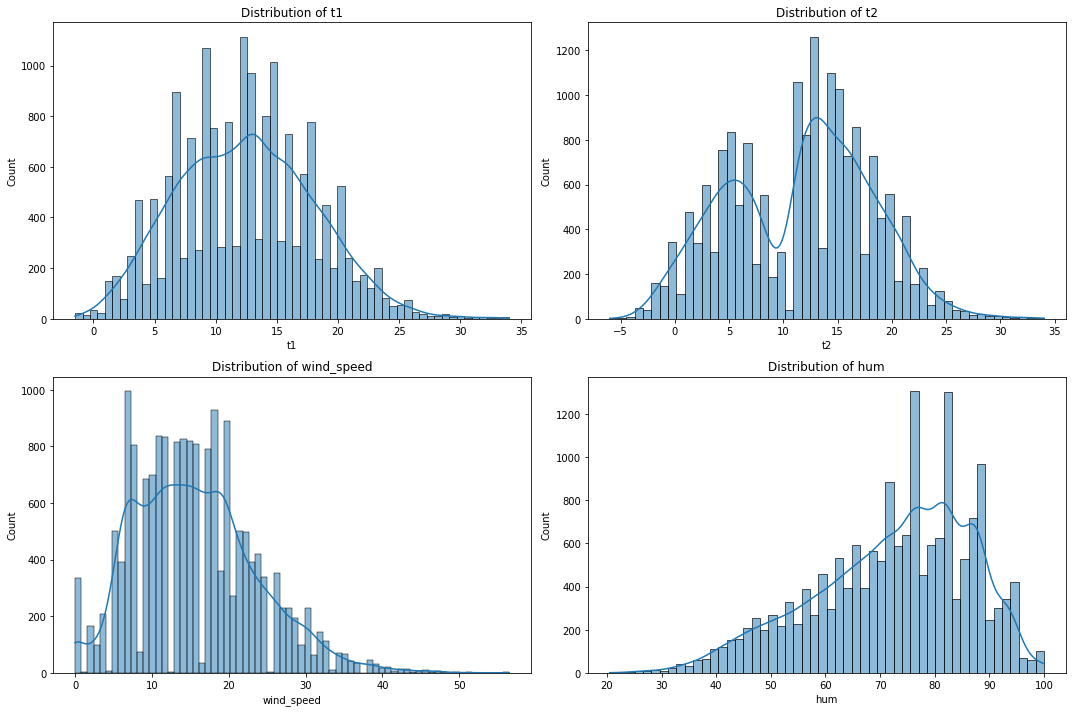

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'london_merges.csv'
df = pd.read_csv(file_path)

# Define columns to plot
columns_to_plot = ['t1', 't2', 'wind_speed', 'hum']

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, column in enumerate(columns_to_plot):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Load the CSV file
data_path = 'bk.csv'
df1 = pd.read_csv(data_path)

# Generate summary statistics
df1.describe()

,casual,registered
count,17414.000000,17414.000000
mean,35.655852,153.598312
std,49.266513,151.269437
min,0.000000,0.000000
25%,4.000000,34.000000
50%,17.000000,115.000000
75%,48.000000,220.000000
max,367.000000,886.000000


In [27]:
file_path = 'london_merges.csv'
df = pd.read_csv(file_path)

# Rename the specified columns
df.rename(columns={'is_holiday': 'holiday', 'is_weekend': 'weekend', 
                   'weather_code': 'weather'}, inplace=True)


/home/ubuntu/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


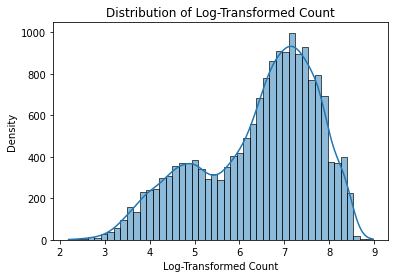

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the 'cnt' column
# Rename 'cnt' to 'count'
df.rename(columns={'cnt': 'count'}, inplace=True)

# Extracting the 'count' column for the labels
y_labels = df['count']

# Applying log transformation
y_labels_log = np.log(y_labels)

# Plotting the distribution of the log-transformed labels
sns.histplot(y_labels_log, kde=True)
plt.title('Distribution of Log-Transformed Count')
plt.xlabel('Log-Transformed Count')
plt.ylabel('Density')
plt.show()


In [3]:
import pandas as pd
from datetime import datetime

# Sample DataFrame to simulate the actual data
file_path = 'london_merges.csv'
df = pd.read_csv(file_path)
New_bike_data = pd.DataFrame(df)

# Define the function to split the datetime
def split_datetime(row):
    if pd.isna(row):
        return [None] * 5
    date, time = row.split()
    day, month, year = date.split('/')  # Changed the order here
    hour = int(time.split(":")[0])
    weekday = datetime.strptime(date, '%d/%m/%Y').isoweekday()  # Changed format to '%d/%m/%Y'
    
    # Print 'year' and 'date' values for debugging
    print("Year:", year)
    print("Date:", date)
    
    return int(year), int(month), int(day), hour, weekday  # Changed the order of return to match the column order

# Ensure the 'timestamp' column exists and apply the function
if 'timestamp' in New_bike_data.columns:
    # Applying the function to 'timestamp' and creating new columns
    result = New_bike_data['timestamp'].apply(lambda x: pd.Series(split_datetime(x),
                                                                  index=['year', 'month', 'day', 'hour', 'weekday']))
    New_bike_data[['year', 'month', 'day', 'hour', 'weekday']] = result

    # Converting to nullable integer types
    New_bike_data['year'] = New_bike_data['year'].astype('Int64')
    New_bike_data['month'] = New_bike_data['month'].astype('Int64')
    New_bike_data['day'] = New_bike_data['day'].astype('Int64')
    New_bike_data['hour'] = New_bike_data['hour'].astype('Int64')
    New_bike_data['weekday'] = New_bike_data['weekday'].astype('Int64')

    # Display the new shape of the DataFrame, data types, and the DataFrame itself
    print(New_bike_data.info())
    print(New_bike_data.head())
else:
    print("Column 'timestamp' does not exist in the DataFrame.")
    
New_bike_data.head()


Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 4/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Year: 2015
Date: 5/01/2015
Y

Year: 2015
Date: 5/02/2015
Year: 2015
Date: 5/02/2015
Year: 2015
Date: 5/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 6/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Year: 2015
Date: 7/02/2015
Y

Year: 2015
Date: 9/03/2015
Year: 2015
Date: 9/03/2015
Year: 2015
Date: 9/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 10/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/2015
Year: 2015
Date: 11/03/

Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 11/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/04/2015
Year: 2015
Date: 12/

Year: 2015
Date: 13/05/2015
Year: 2015
Date: 13/05/2015
Year: 2015
Date: 13/05/2015
Year: 2015
Date: 13/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 14/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/05/2015
Year: 2015
Date: 15/

Year: 2015
Date: 14/06/2015
Year: 2015
Date: 14/06/2015
Year: 2015
Date: 14/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 15/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/06/2015
Year: 2015
Date: 16/

Year: 2015
Date: 7/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 8/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Year: 2015
Date: 9/07/2015
Y

Year: 2015
Date: 10/08/2015
Year: 2015
Date: 10/08/2015
Year: 2015
Date: 10/08/2015
Year: 2015
Date: 10/08/2015
Year: 2015
Date: 10/08/2015
Year: 2015
Date: 10/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 11/08/2015
Year: 2015
Date: 12/08/2015
Year: 2015
Date: 12/08/2015
Year: 2015
Date: 12/08/2015
Year: 2015
Date: 12/08/2015
Year: 2015
Date: 12/08/2015
Year: 2015
Date: 12/

Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 15/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/09/2015
Year: 2015
Date: 16/

Year: 2015
Date: 18/10/2015
Year: 2015
Date: 18/10/2015
Year: 2015
Date: 18/10/2015
Year: 2015
Date: 18/10/2015
Year: 2015
Date: 18/10/2015
Year: 2015
Date: 18/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 19/10/2015
Year: 2015
Date: 20/10/2015
Year: 2015
Date: 20/10/2015
Year: 2015
Date: 20/10/2015
Year: 2015
Date: 20/10/2015
Year: 2015
Date: 20/10/2015
Year: 2015
Date: 20/

Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 22/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/11/2015
Year: 2015
Date: 23/

Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 26/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/12/2015
Year: 2015
Date: 27/

Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 28/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/01/2016
Year: 2016
Date: 29/

Year: 2016
Date: 19/02/2016
Year: 2016
Date: 19/02/2016
Year: 2016
Date: 19/02/2016
Year: 2016
Date: 19/02/2016
Year: 2016
Date: 19/02/2016
Year: 2016
Date: 19/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 20/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/02/2016
Year: 2016
Date: 21/

Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 22/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/03/2016
Year: 2016
Date: 23/

Year: 2016
Date: 26/04/2016
Year: 2016
Date: 26/04/2016
Year: 2016
Date: 26/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 27/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/04/2016
Year: 2016
Date: 28/

Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 30/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/05/2016
Year: 2016
Date: 31/

Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 3/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 4/07/2016
Year: 2016
Date: 5/07/2016
Year: 2016
Date: 5/07/2016
Year: 2016
Date: 5/07/2016
Y

Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 6/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Year: 2016
Date: 7/08/2016
Y

Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 12/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/09/2016
Year: 2016
Date: 13/

Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 2/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Year: 2016
Date: 3/10/2016
Y

Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 6/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 7/11/2016
Year: 2016
Date: 8/11/2016
Year: 2016
Date: 8/11/2016
Y

Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 10/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Year: 2016
Date: 11/12/2016
Yea

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  float64
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  int64  
 7   is_holiday    17414 non-null  int64  
 8   is_weekend    17414 non-null  int64  
 9   season        17414 non-null  int64  
 10  casual        17414 non-null  int64  
 11  registered    17414 non-null  int64  
 12  year          17414 non-null  Int64  
 13  month         17414 non-null  Int64  
 14  day           17414 non-null  Int64  
 15  hour          17414 non-null  Int64  
 16  weekday       17414 non-null  Int64  
dtypes: Int64(5), float64(5), int64(6), object(1)
memory usage: 2.3+ MB
No

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,casual,registered,year,month,day,hour,weekday
0,4/01/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3,3,13,2015,1,4,0,7
1,4/01/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3,8,32,2015,1,4,1,7
2,4/01/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3,5,27,2015,1,4,2,7
3,4/01/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3,3,10,2015,1,4,3,7
4,4/01/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3,5,1,2015,1,4,4,7


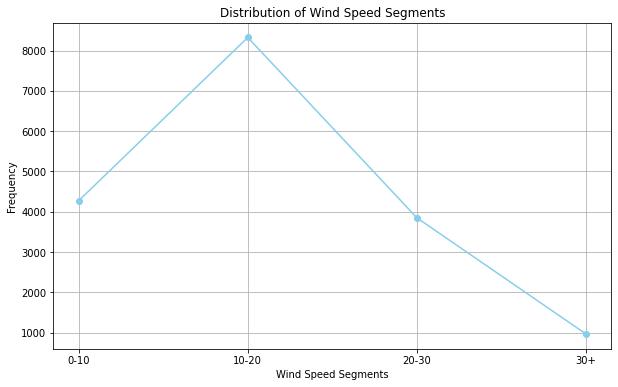

,timestamp,count,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,casual,registered,year,month,day,hour,weekday,wind_speed_segment
0,4/01/2015 0:00,182.0,3.0,2.0,93.0,6.0,3,0,1,3,3,13,2015,1,4,0,7,0-10
1,4/01/2015 1:00,138.0,3.0,2.5,93.0,5.0,1,0,1,3,8,32,2015,1,4,1,7,0-10
2,4/01/2015 2:00,134.0,2.5,2.5,96.5,0.0,1,0,1,3,5,27,2015,1,4,2,7,0-10
3,4/01/2015 3:00,72.0,2.0,2.0,100.0,0.0,1,0,1,3,3,10,2015,1,4,3,7,0-10
4,4/01/2015 4:00,47.0,2.0,0.0,93.0,6.5,1,0,1,3,5,1,2015,1,4,4,7,0-10


In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the 'wind_speed' column

# Create wind speed segments
bins = [0, 10, 20, 30, float('inf')]
labels = ['0-10', '10-20', '20-30', '30+']
df['wind_speed_segment'] = pd.cut(df['wind_speed'], bins=bins, labels=labels, right=False)

# Count the frequency of each segment
segment_counts = df['wind_speed_segment'].value_counts().sort_index()

# Plotting the distribution of wind speed segments
plt.figure(figsize=(10, 6))
plt.plot(segment_counts.index, segment_counts.values, marker='o', linestyle='-', color='skyblue')
plt.title('Distribution of Wind Speed Segments')
plt.xlabel('Wind Speed Segments')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
df.head()


In [4]:
import pandas as pd
print(New_bike_data.head()
# Check and convert columns to appropriate data types
if 'cnt' in New_bike_data.columns:
    New_bike_data['cnt'] = New_bike_data['cnt'].astype('Int64')

if 'casual' in New_bike_data.columns:
    New_bike_data['casual'] = New_bike_data['casual'].astype('Int64')

if 'registered' in New_bike_data.columns:
    New_bike_data['registered'] = New_bike_data['registered'].astype('Int64')

if 'is_holiday' in New_bike_data.columns:
    New_bike_data['is_holiday'] = New_bike_data['is_holiday'].astype('Int64')

if 'weather_code' in New_bike_data.columns:
    New_bike_data['weather_code'] = New_bike_data['weather_code'].astype('Int64')

if 'is_weekend' in New_bike_data.columns:
    New_bike_data['is_weekend'] = New_bike_data['is_weekend'].astype('Int64')

if 'season' in New_bike_data.columns:
    New_bike_data['season'] = New_bike_data['season'].astype('Int64')

# Print the data types of the DataFrame to verify the changes
print(New_bike_data.dtypes)

timestamp        object
cnt               Int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code      Int64
is_holiday        Int64
is_weekend        Int64
season            Int64
casual            Int64
registered        Int64
year              Int64
month             Int64
day               Int64
hour              Int64
weekday           Int64
dtype: object


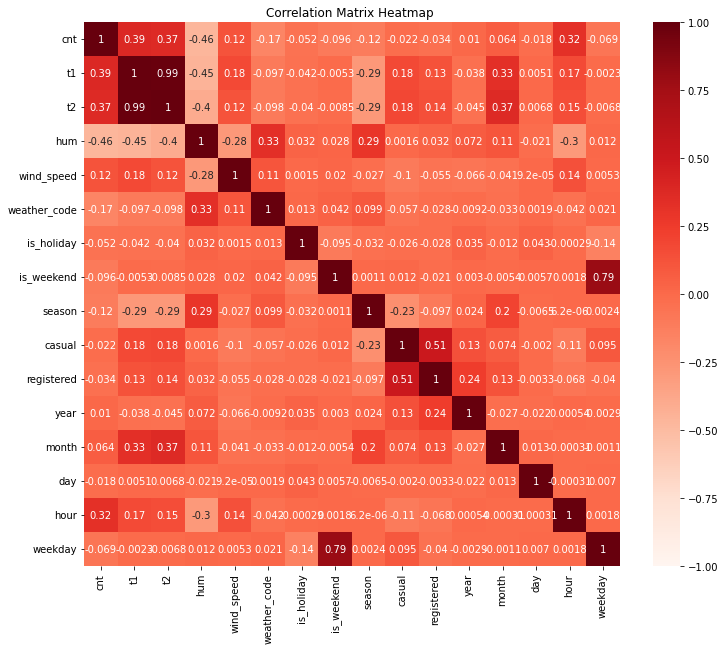

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calculate the correlation matrix
corr_matrix = New_bike_data.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cmap='Reds',vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix Heatmap ')
plt.show()


In [10]:
New_bike_data.drop([ 'casual', 'registered','t2','timestamp'], axis=1, inplace=True)
New_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cnt           17414 non-null  Int64  
 1   t1            17414 non-null  float64
 2   hum           17414 non-null  float64
 3   wind_speed    17414 non-null  float64
 4   weather_code  17414 non-null  Int64  
 5   is_holiday    17414 non-null  Int64  
 6   is_weekend    17414 non-null  Int64  
 7   season        17414 non-null  Int64  
 8   year          17414 non-null  Int64  
 9   month         17414 non-null  Int64  
 10  day           17414 non-null  Int64  
 11  hour          17414 non-null  Int64  
 12  weekday       17414 non-null  Int64  
dtypes: Int64(10), float64(3)
memory usage: 1.9 MB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
New_bike_data.rename(columns={'is_holiday': 'holiday', 'is_weekend': 'weekend', 
                   'weather_code': 'weather'}, inplace=True)

X = New_bike_data[["t1", 'hum', 'wind_speed', 'weather', 'holiday', 'weekend', 'season']]
y = New_bike_data['cnt']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize and fit StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Dictionary of models
models = {
    'Logistic_Regression': LogisticRegression(),
    'Random_Forest': RandomForestClassifier(),
    'SVM': SVC(kernel='rbf'), 
    'KNN': KNeighborsClassifier(n_neighbors=10),
    'Naive_Bayes': GaussianNB()
}

# Loop through each model, train, and evaluate on both training and test sets
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    train_predictions = model.predict(X_train)
    test_predictions = model.predict(X_test)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_precision = precision_score(y_train, train_predictions, average='weighted', zero_division=1)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_precision = precision_score(y_test, test_predictions, average='weighted', zero_division=1)
    
    # Print results
    print(f'{model_name} Model Performance:')
    print(f'Training - Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}')
    print(f'Testing  - Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}')
    print()

Logistic_Regression Model Performance:
Training - Accuracy: 0.0103, Precision: 0.7870
Testing  - Accuracy: 0.0009, Precision: 0.8592

